# Energia cinètica

Quan un cos en moviment impacta amb un altre i ambdós queden en repòs s'allibera calor equivalent a l'energia del moviment. Si mai heu rebut una bufetada no tindreu cap dubte al respecte.

Aquesta energia cinètica depèn de la massa i de la velocitat del cos:

$E_c=\frac{1}{2} m v^2$

Si volem obtenir aquesta energia en joules, caldrà expressar la massa en kg i la velocitat en m/s.

Quan variem la velocitat d'un cos cal exercir una força sobre ell. Recordem la segona llei de Newton:

$\Large  \overrightarrow{F}=\frac{\Delta \overrightarrow{p}}{\Delta t} = \frac{\Delta (m \overrightarrow{v})}{\Delta t} = \frac{\Delta m}{\Delta t} \overrightarrow{v} + m \frac{\Delta \overrightarrow{v}}{\Delta t} = \dot{m} \overrightarrow{v} + m \overrightarrow{a} $

si suposem la massa constant $\dot{m} = 0$:

$\overrightarrow{F} = m \overrightarrow{a}  $

que és la versió simplificada (i restringida) de la segona llei de Newton que Eüler va proposar un segle després{cite}`FisBas1` i que tan popular s'ha fet a les escoles, oblidant la seva formulació original i les seves implicacions.  Sense la dependència en la variació de massa de l'expressió original és impossible justificar, per exemple, per què un globus de goma inflat surt disparat quan desfem el nus i es desinfla, ja que cap força actua sobre el globus que no hi fos quan el tenien tancat amb el nus.

Com ja hem avançat anteriorment , en el cas del desplaçament d'un cos sobre el que actua una força el treball desenvolupat és

$W =  \overrightarrow{F} \cdot \overrightarrow{d} \equiv F \ d  \ cos\alpha $

essent $\alpha$ l'angle que formen els vectors $\overrightarrow{F}$ i $\overrightarrow{d}$: com més paral·lels són aquests vectors, més gran és el treball realitzat (i, per tant, l'energia transferida), sent nul si són vectors perpendiculars.

## Exemple: xoc inelàstic

>Dos cotxes amb massa m= 1000 kg circulen a 60 km/h i xoquen frontalment, quedant aturats. Calculeu   
 a) L'energia alliberada en forma de calor per a cada cotxe.   
 b) Els temps de frenada si els frens a cada cotxe exerceixen una força constant F = 4 kN   
 c) L'espai recorregut en aquesta frenada   
 d) Repetiu els apartats anteriors si la velocitat fos el doble (120 km/h) 

### Solució

Veiem que podem fer amb el que sabem de teoria. 

A l'apartat *(a)* es tracta d'un xoc inelàstic amb velocitat final = 0 m/s on tota l'energia cinètica es dissipa en forma de calor:

$Q = \Delta E = Ec(v=v0)$   

$Ec = \frac{1}{2} \cdot m \cdot v^{2}$

A l'apartat *(b)* tenim un M.U.A. amb acceleració negativa que acaba al repòs:

$F = m \cdot a \Rightarrow  a = \frac{F}{m}$

$v = v_{0} + a \cdot t$

$\Delta r = v_{0} \cdot t + \frac{1}{2}\cdot a \cdot t^{2}$

Per tant, sembla que introduïnt les dades a les fòrmules tenim resolt el nostre problema

Anem a la pràctica ...

#### Treballant amb unitats a python. La llibreria *pint*

La llibreria *pint* ens permet treballar amb unitats, fer conversions i donar més rigor als càlculs   
Teniu un bon tutorial a https://pint.readthedocs.io/en/0.13/tutorial.html

In [1]:
from pint import UnitRegistry
ureg = UnitRegistry()
m = 1000 * ureg.kg
v0 = 60 * ureg.km / ureg.hour

El primer pas seria tenir les dades en Sistema Internacional. Fixeu-vos que la llibreria *pint* s'encarrega d'això.   
Si bé v0 el tenim en $\frac{km}{h}$

In [2]:
v0

60.0 <Unit('kilometer / hour')>

Sempre podem convertir una dada al Sistema Internacional amb `.ito_base_units()`

In [3]:
v0.ito_base_units()
v0

16.666666666666668 <Unit('meter / second')>

Podem millorar l'expressió gestionan el format de sortida:

In [4]:
'Velocitat inicial en S.I: {:P~}'.format(v0)

'Velocitat inicial en S.I: 16.666666666666668 m/s'

Si haguessim fet nosaltres mateixos la conversió obtindriam el mateix valor:

In [5]:
v0 = 60 * ureg.km / ureg.hour
v0 = v0 * 1000 * ureg.m / ureg.km * ureg.hour / (3600 * ureg.s)
v0

16.666666666666668 <Unit('meter / second')>

Encara que de vegades haurem de forçar la simplificació d'uniotats amb `ito_reduced_units()` (veure https://pint.readthedocs.io/en/0.13/tutorial.html#converting-quantities)

In [6]:
density = 1.4 * ureg.gram / ureg.cm**3
volume = 10*ureg.cc
mass = density*volume
print(mass)

14.0 cubic_centimeter * gram / centimeter ** 3


In [7]:
mass.ito_reduced_units()
mass

14.0 <Unit('gram')>

Ara que sabem com treballar amb unitats a python ens podrem dedicar a resoldre el nostre problema

#### a) L'energia alliberada en forma de calor per a cada cotxe.  

Ara ja podem calcular la energia cinética de cada cotxe $Ec=\frac{1}{2}\cdot m\cdot v^{2}$

In [8]:
Ec=1/2*m*v0**2
Ec

138888.8888888889 <Unit('kilogram * meter ** 2 / second ** 2')>

Naturalment l'energia es mesura en J. Podem fer el canvi amb `.ito(ureg.J)`

In [9]:
Ec.ito(ureg.J)
Ec

138888.8888888889 <Unit('joule')>

I tenir-la amb un múltiple adient. *pint* ho pot fer amb `.to_compact`

In [10]:
print (Ec.to_compact())

138.8888888888889 kilojoule


Que justament és alliberada en forma de calor per a cada cotxe   

L'expresió correcta d'aquest resultat seria **Q = 138,8 kJ**

#### b) Els temps de frenada si els frens a cada cotxe exerceixen una força constant F = 4 kN   

Com la força de frenada s'oposa a la velocitat tindrà signe negatiu:

In [11]:
F =  -4 * ureg.kN
a = F / m
a

-0.004 <Unit('kilonewton / kilogram')>

Ho arreglem amb `.ito_base_units()`

In [12]:
a.ito_base_units()
a

-4.0 <Unit('meter / second ** 2')>

In [13]:
t = (0 * ureg.m / ureg.s - v0) / a
t

4.166666666666667 <Unit('second')>

Per tant tindrem un tems de frenada **t = 4,167 s** 

#### c) L'espai recorregut en aquesta frenada   

In [14]:
r = v0 * t + 1 / 2 * a *t**2
r

34.72222222222223 <Unit('meter')>

Es a dir, l'espai recorregut en aquesta frenada derà de **r = 34,72 m**

#### d) Repetiu els apartats anteriors si la velocitat fos el doble (120 km/h) 

Podem repetir les fòrmules, canviant el valor inicial de v0:

In [15]:
v0 = 120 * ureg.km / ureg.hour
v0.ito_base_units()
v0

33.333333333333336 <Unit('meter / second')>

In [16]:
Ec=1/2*m*v0**2
Ec.ito(ureg.J)
print (Ec.to_compact())

555.5555555555557 kilojoule


**a) Q' = 555,6 kJ**

In [17]:
t = (0 * ureg.m / ureg.s - v0) / a
t

8.333333333333334 <Unit('second')>

**b) t' = 8,333 s**

In [18]:
r = v0 * t + 1 / 2 * a *t**2
r

138.8888888888889 <Unit('meter')>

**c) r = 138,9 m**

### Conclusions

Comparem resultats:

<table>
<tbody>
<tr><td>v0</td><td>Q</td><td>t</td><td>r</td></tr>
<tr><td>60 km/h</td><td>138,8 kJ</td><td>4,167 s</td><td>34,72 m</td></tr>
<tr><td>120 km/h</td><td>555,8 kJ</td><td>8,333 s</td><td>138,9 m</td></tr>
</tbody>
</table>


Si bé el temps s'ha duplicat com la velocitat inicial, la calor dissipada i la distància recorreguda s'han multiplicat per 4. Això és degut a la depèndencia quadràtica de **Q** i **r** amb la velocitat inicial. El temps **t**, en canvi, té una dependència linial amb **v0**

Veiem gràficament aquestes dependències:

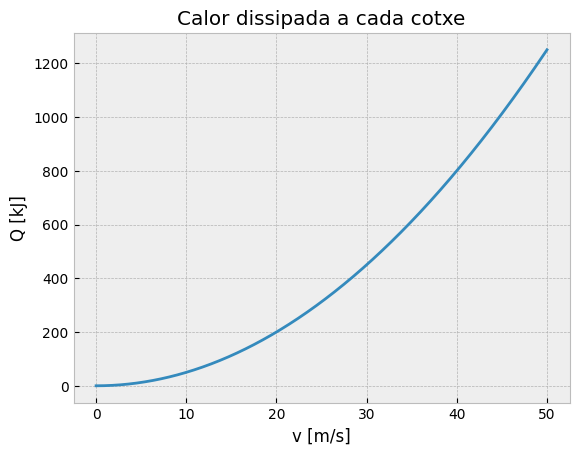

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x, 1 / 2 * x * x);
plt.title("Calor dissipada a cada cotxe")
plt.xlabel("v [m/s]")
plt.ylabel("Q [kJ]");

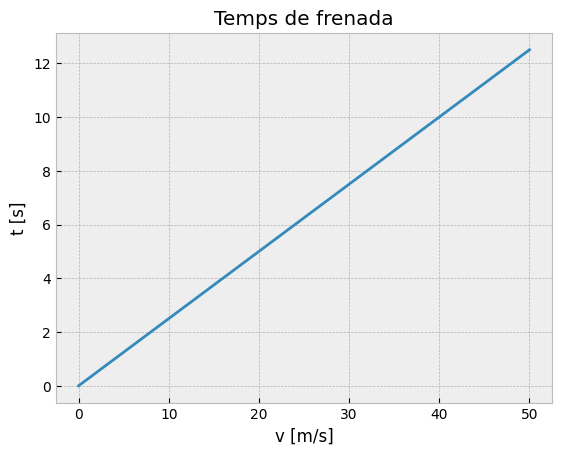

In [21]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x, x / 4);
plt.title("Temps de frenada")
plt.xlabel("v [m/s]")
plt.ylabel("t [s]");

Com imagineu, la gràfica de l'espai recorregut a la frenada és més difícil de fer, ja que depén de **v0** i de **t**, que també depèn de **v0**. Però no per això aquesta dependència **quadràtica** és menys important, com sabreu tots els que estudieu per treure's el carnet de conduir!

$v = v_{0} + a \cdot t = 0 \Rightarrow t = - \frac{v_{0}}{a} $

$\Delta r = v_{0} \cdot t + \frac{1}{2}\cdot a \cdot t^{2}$

$\Delta r = v_{0} \cdot (- \frac{v_{0}}{a}) + \frac{1}{2}\cdot a \cdot {(- \frac{v_{0}}{a})^{2}}$

$\Delta r = - \frac{(v_{0})^{2}}{a} + \frac{1}{2}\cdot \frac{(v_{0})^{2}}{a} = \frac{1}{2} \frac{(v_{0})^{2}}{a}$

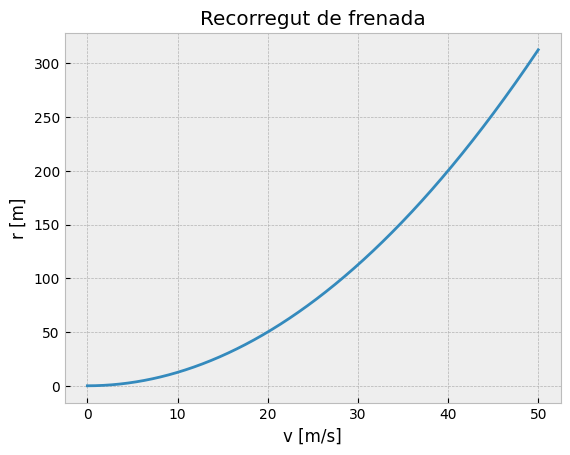

In [22]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x, 1 / 2 * x * x / 4);
plt.title("Recorregut de frenada")
plt.xlabel("v [m/s]")
plt.ylabel("r [m]");

Representem la mateixa corba posant la velocitat en $\frac{km}{h}$

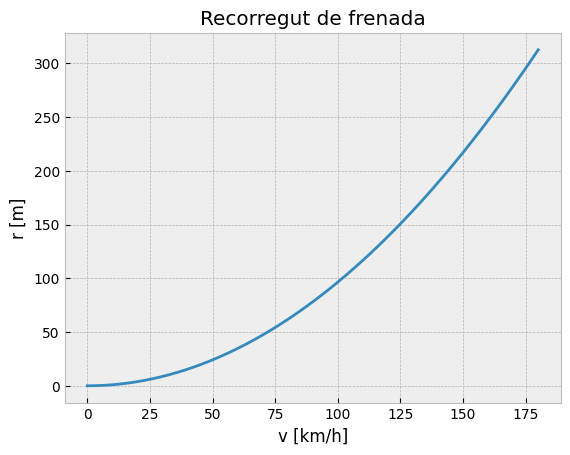

In [23]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 50, 1000)
ax.plot(x * 3.6, 1 / 2 * x * x / 4);
plt.title("Recorregut de frenada")
plt.xlabel("v [km/h]")
plt.ylabel("r [m]");

Com veieu per a una acceleració de - 4 $\frac{m}{s}$ es compleix la regla de dividir per 10 i elevar al quadrat la velocitat en $\frac{km}{h}$ per obtenir la distància de seguretat en $m$. Aquesta acceleració correspon a **0,4g** , valor raonable en un cas real.

En aquest exemple es manifesta la dependència quadràtica de l'energia cinètica amb la velocitat i el seu efecte en la frenada: duplicant la velocitat inicial l'energia cinètica (i conseqüentment la calor alliberada) és multiplica per 4. El mateix passa amb la distància de frenada, com sabreu els que teniu carnet de conduir o esteu estudiant per treure'l.

Pot sorprendre  el valor de la calor alliberada comparat amb l'obtingut a l'exemple de l'estufa quan parlàvem de la potència. Penseu que la violència del xoc depèn tant de l'energia alliberada com del temps en que s'allibera. En el cas del xoc aquesta energia s'allibera en menys d'un segon, corresponent a una potència de l'ordre dels MW. 


## Principi de conservació del moment. Xocs. Explosions.
El producte  present a la segona llei de Newton es denomina quantitat de moviment o moment lineal del cos. Aquesta magnitud va ser estudiada per Descartes mig segle abans de Newton, i que va formular el principi de conservació de la quantitat de moviment a la seva obra El Món (1633).

A partir de la 2a llei de Newton:

$\Large \overrightarrow{F} = \frac{\Delta \overrightarrow{p}}{\Delta t} \Rightarrow \Delta \overrightarrow{p} = \overrightarrow{F} \cdot \Delta t$

El producte $\overrightarrow{F} \cdot \Delta t$   s'anomena **impuls**. En absència de forces externes, el moment és constant, donant lloc al que s'anomena *principi de conservació del moment lineal*, molt útil per resoldre problemes de xocs entre cossos (de fet, Descartes va deduir aquesta llei després de les seves observacions com a jugador de billar, joc  de moda a la França d'aquella època).

Si l'energia cinètica és conserva, parlem de *xoc elàstics*. En cas contrari, parlem de *xocs inelàstics*, on tot o part de l'energia es transforma en calor i deformacions. Si tota l'energia cinètica es perd i els dos cossos es fusionen en un sol degut a les deformacions, el problema té fàcil solució.


### Exemple: xoc inelàstic

>A una pista de gel un patinador de 50 kg en repòs rep un impacte a curta distància de una bola de pintura de 3,5 g a una velocitat de 90 m/s (valors típics del torneigs de paintball, on es prohibeix disparar a menys de 3 m de distància o més en funció de les regles). Quina energia porta el projectil? Quina serà la velocitat del patinador després de l'impacte? Quanta energia cinètica és transforma en calor?

Es tracta d'un xoc inelàstic, on no és conserva l'energia cinètica però si el moment lineal

$E_i = \frac{1}{2} \ m \ v^2 = \frac{1}{2} \ 0,0035 kg \ (90 m/s)^2 = 14 J$

$p_1+p_2 = p_{1+2} \Rightarrow m_1v_1 + m_2v_2 = (m_1+m_2)v_{1+2}$

$v_{1+2}=\Large \frac{m_1v_1+m_2v_2}{m_1+m_2} = \frac{0,0035 kg \cdot 90 \ m/s+50 kg \cdot 0\ m/s}{50,0035 kg} = 6,3 mm/s$

La velocitat final és molt petita i, malgrat la massa del conjunt, podem menysprear l'energia cinètica final

$E_f = \frac{1}{2} \ m \ v^2 = \frac{1}{2} \ 50,0035 kg  \ (0,0063 m/s)^2 = 0,99 mJ$

que no afecta significativament al càlcul de la calor dissipada:

$Q=E_i-E_f= 14J - 0,99 mJ = 13,911 J \simeq 14J$

A l'exemple anterior tornem a haver de matisar: si bé l'energia de la bola no és tan alta (té una massa molt petita), el fet de que l'impacte sigui molt localitzat (tenen un diàmetre de 18 mm) i en molt poc temps (porten una velocitat inicial propera als 300 km/h) obliguen a fixar unes distàncies mínimes, amb les que encara podem produir hematomes seriosos malgrat les proteccions dels participants.

Us pot semblar que la velocitat final sigui molt petita, però és apreciable (equivalent a un desplaçament d'uns dos palms després d'un minut), i sorprèn donada la diferència de masses entre el projectil i el patinador. Imagineu-vos una bala de veritat, amb una massa superior i velocitats entre els 300 i 1200 m/s: el Schwarzenegger no s'hauria de moure amb tanta llibertat quan li crivellen al cinema.

### Exemple: xoc elàstic
>En un joc de hoquei taula un jugador deixa anar la seva maça de 150 g que dona un cop a 0,6 m/s contra el disc de 39 g que anava a 1,6  m/s en sentit contrari. Calcula las velocitats finals de la maça i del disc.


#### Solució

Es tracta d'un xoc elàstic, on és compleix la conservació de l'energia cinètica, a més a més de la conservació del moment. Encara que, en general, aquest tipus de problema l'hauríem de plantejar vectorialment, com les velocitats són oposades el podem escriure de forma escalar:

$$
\frac{1}{2}\cdot m_{1} \cdot v_{1i}^{2} + \frac{1}{2}\cdot m_{2} \cdot v_{2i}^{2} = \frac{1}{2}\cdot m_{1} \cdot v_{1f}^{2} + \frac{1}{2}\cdot m_{2} \cdot v_{1f}^{2} \\
m_{1} \cdot v_{1i} + m_{2} \cdot v_{2i} = m_{1} \cdot v_{1f} + m_{2} \cdot v_{2f}
$$


posem les dades en unitats S.I., encara que ometrem les unitats per simplificar la feina:

$$
\frac{1}{2}\cdot 0,15 \cdot 0,6^{2} + \frac{1}{2}\cdot 0,039 \cdot 1,6^{2} = \frac{1}{2}\cdot 0,15 \cdot v_{1f}^{2} + \frac{1}{2}\cdot 0,039 \cdot v_{1f}^{2} \\
0,15 \cdot 0,6 + 0,039 \cdot 1,6 = 0,15 \cdot v_{1f} + 0,039 \cdot v_{2f}
$$

Es tracta d'un sistema **no linial** de 2 equacions amb 2 incògnites. 

Podem calcular el primer membre de cada equació, ja que coneixem les condicions inicials:

In [1]:
1/2*0.15*0.6**2+1/2*0.039*1.6**2

0.07692000000000002

In [2]:
0.15*0.6+0.039*1.6

0.1524

Per resoldre aquest sistema podem utilitzar el paquet de calcul simbòlic *sympy*

In [3]:
from sympy import *
x, y = symbols("x y")

solve([Eq(0.15/2*x**2+0.039/2*y**2, 0.07692), Eq(0.15*x+0.039*y, 0.1524)],[x,y])

[(0.600000000000000, 1.60000000000000), (1.01269841269841, 0.0126984126984127)]

#### Conclusions

Fixeu-vos que el sistema admet dues solucions:

Aquesta solució correspon a abans del xoc:
$
 \left\{ \begin{array}{cl}
v_{1}=0,6  \\
 v_{2}=1,6
\end{array} \right.
$

Aquesta solució correspon a després del xoc:
$
 \left\{ \begin{array}{cl}
v_{1}=1,0127  \\
 v_{2}=0,0127
\end{array} \right.
$

#### Potència de *sympy*

L'ajut de la llibreria *sympy* és en aquest cas espectacular. Sense ella hauríem de resoldre a ma el sistema, operació extremadament pesada ja que es tracta d'un sistema no linial. La millor forma de resoldre aquests sistemes és el mètode de substitució:

Aïllem $v_{2f}$ a l'equació de conservació del moment:

$$
0,1524 = 0,15 \cdot v_{1f} + 0,039 \cdot v_{2f} \Rightarrow v_{2f} = \frac{0,1524 - 0,15 \cdot v_{1f}}{0,039} \\
0,07692 = 0,075 \cdot v_{1f}^{2} + 0,0195 \cdot v_{1f}^{2}
$$

i substituim la seva expressió a l'equació de conservació de l'energia:

$$
0,07692 = \frac{1}{2}\cdot 0,15 \cdot v_{1f}^{2} + \frac{1}{2}\cdot 0,039 \cdot v_{1f}^{2} \Rightarrow 0,07692 = 0,075 \cdot v_{1f}^{2} + 0,0195 \cdot  \left(\frac{0,1524 - 0,15 \cdot v_{1f}}{0,039}\right)^2
$$

Desenvolupem el quadrat:

$$
0,07692 = 0,075 \cdot v_{1f}^{2} + 0,0195 \cdot  \left( \frac{0,1524^2 - 2 \cdot 0,1524 \cdot 0,15 \cdot v_{1f} + 0,15^2 \cdot v_{1f}^2}{0,039^2} \right)
$$

Simplifiquem l'expressió:

$$
0,07692 = 0,075 \cdot v_{1f}^{2} + 0,2978 - 0,5862 \cdot v_{1f} + 0,2885 \cdot v_{1f}^2
$$

$$
(0,075 +0,2885) \cdot v_{1f}^2 - 0,5862 \cdot v_{1f}  + 0,2978 - 0,07692 =  0 
$$

Arribem a una eqüació de 2n grau:

$$
0,3635 \cdot v_{1f}^2 - 0,5862 \cdot v_{1f}  + 0,2209 =  0 
$$

que té com a solucions:

$
v_{1f} = \left\{ \begin{array}{cl}
1,0127  \\
0,6
\end{array} \right.
$

Calculem $v_{2f}$ a partir de $v_{1f}$. Ems dona, respectivament,

$
v_{2f} = \left\{ \begin{array}{cl}
0,0127  \\
1,6
\end{array} \right.
$


Aquest darrer exemple mostra com de pesat pot arribar a ser un càlcul. Imagineu-vos si en lloc de xocar frontalment ho haguessin fet amb un cert angle... Sort dels ordinadors d'avui en dia!

### Exemple: conjunt que es separa
>El SAFER és un modul de propulsió que porten els astronautes pels passeigs extravehiculars (EVA). Aquest sistema porta 1,4 kg de N2 a alta pressió i s'allibera per qualsevol dels 24 conductes de que disposa el sistema, permetent una variació màxima en la velocitat de 3,05 m/s.
>
>Suposem que un astronauta amb el seu equip EVA en repòs amb una massa de 200 kg allibera N2 que surt a 400 m/s fins que l'astronauta aconsegueix una velocitat de 1 m/s. Quina quantitat de gas ha sortit?

Es compleix la conservació del moment, que inicialment es 0. Per tant, el moment del gas sortint ha de ser igual a la que agafa l'astronauta:

$m_1v_1=m_2v_2 \Rightarrow m_2 = m_1 \frac{v_1}{v_2} = 200kg \frac{1 \ m/s}{400 \ m/s}=0,5 \ kg$

Aquest exemple aplicable a la resta de sistemes a reacció és molt semblant a la solució de problemes relacionats amb explosions: partim d'un objecte en repòs que es fragmenta en diferents cossos que surten disparats en diverses direccions, sense cap força externa. Utilitzant la conservació del moment lineal podem resoldre aquest tipus de problemes. 

![](img/Energia/astronauta.jpg)